In [ ]:
#plot daily returns for last 3 weeks, or define a date
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import datetime as dt
%matplotlib nbagg
# Define function to plot stock returns
def plot_stock_returns(stock_symbols):
    # Set start and end date for stock data
    end_date = dt.date.today()
    start_date = end_date - dt.timedelta(days=21)

    # Split stock symbols into list
    stock_symbols_list = stock_symbols.split(",")

    # Get stock data for specified time period
    stock_data = yf.download(stock_symbols_list, start=start_date, end=end_date)['Adj Close']

    # Calculate daily returns for each stock
    stock_returns = stock_data.pct_change()

    # Plot stock returns
    fig, ax = plt.subplots()
    stock_returns.plot(ax=ax, title='Stock Returns')
    ax.legend(stock_symbols_list)
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Return')

    # Format y-axis ticks as percentages
    y_formatter = mtick.PercentFormatter(xmax=1, decimals=2)
    ax.yaxis.set_major_formatter(y_formatter)

    plt.show()

# Get user input for list of stock symbols
stock_symbols = input('Enter stock symbols (separated by comma): ')

# Call plot_stock_returns function
plot_stock_returns(stock_symbols)



<IPython.core.display.Javascript object>


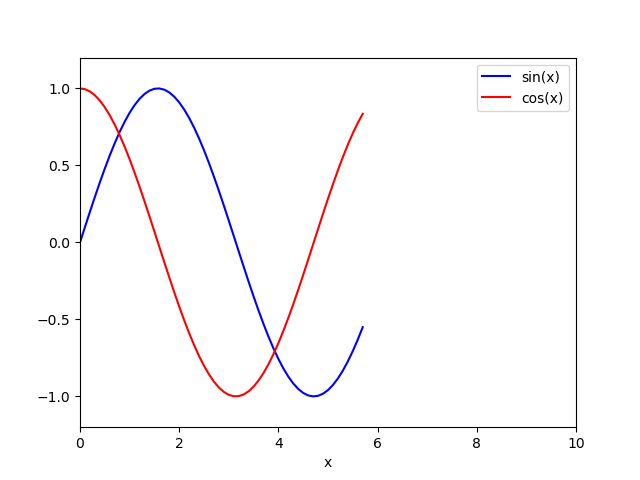

In [30]:
#animated line chart example
import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg

# Generate some random data
x = np.arange(0, 10, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

# Create the figure and axis objects
fig, ax = plt.subplots()

# Set the x and y limits
ax.set_xlim(0, 10)
ax.set_ylim(-1.2, 1.2)

# Create the line plots
line1, = ax.plot([], [], 'b', label='sin(x)')
line2, = ax.plot([], [], 'r', label='cos(x)')

# Add a legend
ax.legend(loc='upper right')

# Define the update function
def update(i):
    # Update the data
    line1.set_data(x[:i], y1[:i])
    line2.set_data(x[:i], y2[:i])
    
    # Set the x-axis label only on the last frame
    if i == len(x) - 1:
        ax.set_xlabel('x')
    
    return line1, line2

# Animate the plot
from matplotlib.animation import FuncAnimation
ani = FuncAnimation(fig, update, frames=len(x), interval=50, blit=True)

# Display the plot
plt.show()


In [29]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Get user input for stock tickers
tickers = input("Please enter the stock tickers to super analyze (separated by commas): ").split(",")

# Initialize empty dataframes for implied and historical volatility
iv_df = pd.DataFrame()
hv_df = pd.DataFrame()

# Get implied volatility for each options contract
iv = []
for call in calls:
    if hasattr(call, 'impliedVolatility'):
        iv.append(call.impliedVolatility)
iv_df[ticker] = iv

# Create figure and subplots
fig, ax = plt.subplots()

# Set labels and title
ax.set_xlabel("Date")
ax.set_ylabel("Volatility")
ax.set_title("Volatility Analysis for {}".format(", ".join(tickers)))

# Define function to update chart with animation
def update(frame):
    # Clear previous plot
    ax.clear()
    
    # Plot implied volatility for each stock ticker
    for ticker in tickers:
        ax.plot(iv_df.index, iv_df[ticker], label="{} Implied Volatility".format(ticker))
        
    # Plot historical volatility for each stock ticker
    for ticker in tickers:
        ax.plot(hv_df.index, hv_df[ticker], label="{} Historical Volatility".format(ticker))
        
    # Set legend and format x-axis
    ax.legend(loc="upper left")
    ax.xaxis.set_major_formatter(plt.DateFormatter("%Y-%m-%d"))
    
    # Set limits based on data range
    ax.set_xlim(iv_df.index.min(), iv_df.index.max())
    ax.set_ylim(0, max(iv_df.max().max(), hv_df.max().max()))
    
# Animate the chart with a delay of 100 milliseconds between frames
ani = FuncAnimation(fig, update, interval=100)

# Show the chart
plt.show()


Please enter the stock tickers to super analyze (separated by commas): WMT


NameError: name 'calls' is not defined

Enter a comma-separated list of stock tickers to plot: INTC


<IPython.core.display.Javascript object>


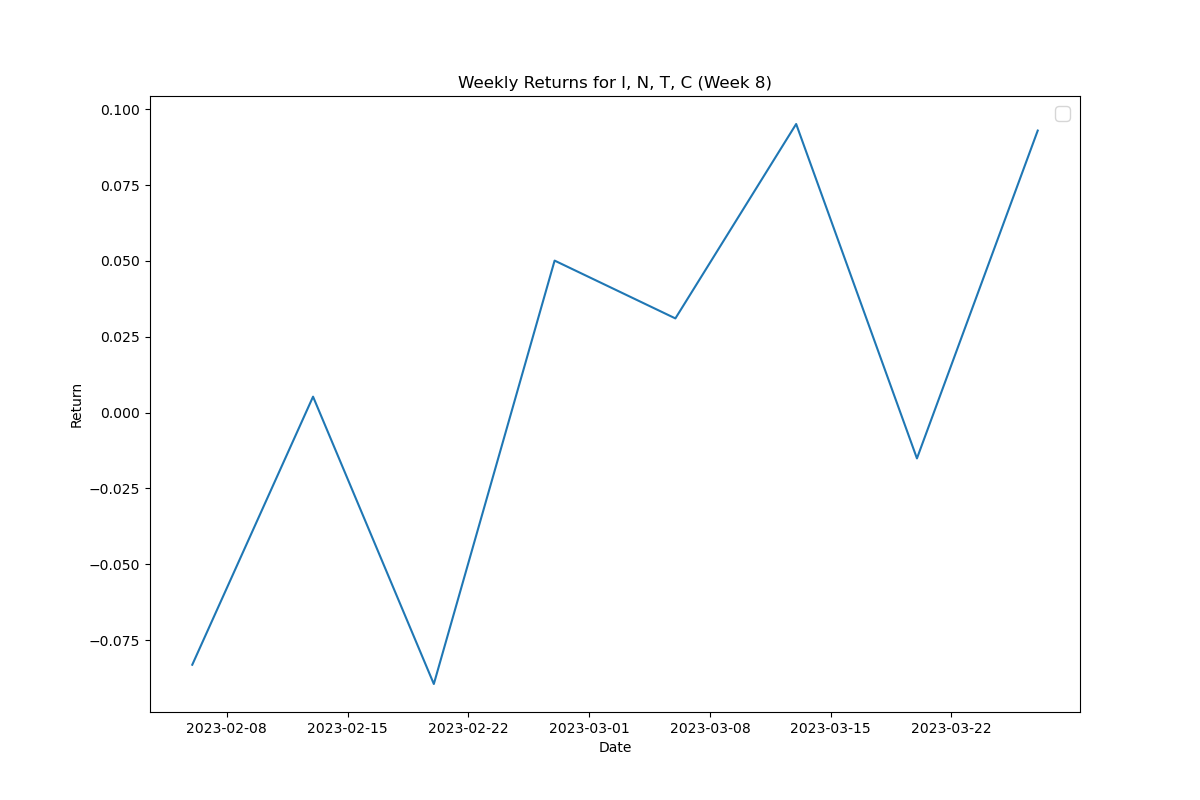

[*********************100%***********************]  1 of 1 completed
Do you want to save the animation as a GIF? (y/n)n


In [31]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import datetime, timedelta

# Get user input for the list of stock tickers to plot
tickers = input("Enter a comma-separated list of stock tickers to plot: ").split(",")

# Define the date range to plot (last 2 months)
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=60)).strftime('%Y-%m-%d')

# Define the figure and axes for the plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Weekly Returns for {}'.format(', '.join(tickers)).upper())
ax.set_xlabel('Date')
ax.set_ylabel('Return')

# Create an empty line for each ticker to use in the legend
for ticker in tickers:
    ax.plot([], [], label=ticker.strip().upper())

# Get the stock data for each ticker and concatenate into a single DataFrame
dfs = []
for ticker in tickers:
    df = yf.download(ticker.strip(), start=start_date, end=end_date, interval='1wk')['Adj Close']
    df = df.pct_change().dropna()
    df.name = ticker.strip().upper()
    dfs.append(df)
df = pd.concat(dfs, axis=1)

# Define the function to update the plot for each animation frame
def animate(i):
    ax.clear()
    ax.set_title('Weekly Returns for {} (Week {})'.format(', '.join(tickers).upper(), i+1))
    ax.set_xlabel('Date')
    ax.set_ylabel('Return')
    ax.plot(df.iloc[:i+1])
    ax.legend(prop={'size': 14})

# Define the animation object and save as a GIF if the user chooses to do so
ani = animation.FuncAnimation(fig, animate, frames=len(df), interval=2000, repeat=True)
save = input("Do you want to save the animation as a GIF? (y/n)").strip().lower()
if save == 'y':
    filename = input("Enter a filename for the GIF: ")
    ani.save(filename, writer='pillow')
plt.show()


Enter a comma-separated list of stock tickers to plot: GME
[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>


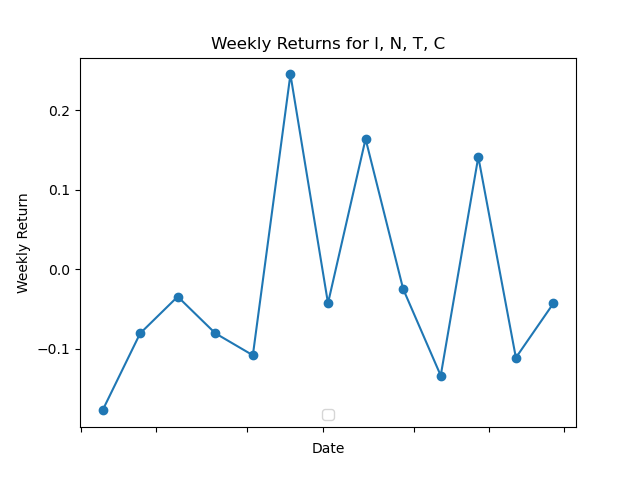

In [32]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define a function to get weekly returns for a given ticker
def get_weekly_returns(ticker):
    data = yf.download(ticker, period="4mo", interval="1wk")
    returns = data["Adj Close"].pct_change().dropna()
    return returns

# Prompt the user for a list of tickers to plot
tickers = input("Enter a comma-separated list of stock tickers to plot: ").split(",")

# Get the weekly returns for each ticker and store them in a DataFrame
returns_df = pd.concat([get_weekly_returns(ticker.strip()) for ticker in tickers], axis=1)
returns_df.columns = tickers

# Define a function to update the plot for each animation frame
def animate(i):
    plt.cla()
    plt.plot(returns_df.iloc[:i], marker="o")
    plt.legend(loc="lower center", ncol=len(tickers))
    plt.xlabel("Date")
    plt.ylabel("Weekly Return")
    plt.title("Weekly Returns for {}".format(", ".join(tickers)))
    plt.gca().get_xaxis().set_major_formatter(plt.NullFormatter())

# Set up the animation
fig = plt.figure()
ani = animation.FuncAnimation(fig, animate, frames=len(returns_df), interval=100)

# Show the plot
plt.show()

In [33]:
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.dates import DateFormatter
%matplotlib nbagg

# Get user input for stock tickers
tickers = input("Enter a comma-separated list of stock tickers: ").split(",")

# Set the x-axis limits
x_start, x_end = 0, 63

# Create the figure and axis objects
fig, ax = plt.subplots()

# Set the x and y limits
ax.set_xlim(x_start, x_end)
ax.set_ylim(0, 50)

# Create the line plots
line1, = ax.plot([], [], 'b', label='Implied Volatility')
line2, = ax.plot([], [], 'r', label='Historical Volatility')

# Add a legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)

# Define the update function
def update(i):
    try:
        # Get data for the current time step
        data = yf.download((stock_symbols_list, start=start_date, end=end_date)['Adj Close']
        iv_data = data.apply(lambda x: x.std() * 100 * (252**0.5))
        print(data)
        print(iv_data)

        iv_data = data.apply(lambda x: x.std() * 100 * (252**0.5))

        print(f"data: {data}")
        print(f"iv_data: {iv_data}")

        # Update the data
        line1.set_data(data.index[:i], iv_data[:i])
        line2.set_data(data.index[:i], data.std() * 100 * (252**0.5))

        # Set the x-axis label only on the last frame
        if i == x_end:
            ax.set_xlabel('Date')

        # Format the x-axis ticks as dates
        date_formatter = DateFormatter('%Y-%m-%d')
        ax.xaxis.set_major_formatter(date_formatter)

        # Set the title
        ax.set_title(f"IV-HV for {', '.join(tickers)} (last 3 months)")

    except Exception as e:
        print(f"Error occurred: {e}")
        raise

    return line1, line2

# Animate the plot
ani = FuncAnimation(fig, update, frames=x_end, interval=100, blit=True)

# Display the plot
plt.show()


SyntaxError: invalid syntax (<ipython-input-33-b89b5963e54f>, line 31)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [35]:
import yfinance as yf

tickers = input("Enter stock tickers separated by a comma: ")

get_tickers = yf.Ticker(tickers)

get_news = get_tickers.news

get_option_dates = get_tickers.options

get_price_target = get_tickers.actions

print(get_price_target)


Enter stock tickers separated by a comma: INTC
            Dividends  Stock Splits
Date                               
1980-10-09   0.000000           2.0
1983-07-01   0.000000           2.0
1987-10-29   0.000000           1.5
1992-10-26   0.003125           0.0
1993-01-26   0.003125           0.0
...               ...           ...
2022-02-04   0.365000           0.0
2022-05-05   0.365000           0.0
2022-08-04   0.365000           0.0
2022-11-04   0.365000           0.0
2023-02-06   0.365000           0.0

[130 rows x 2 columns]


No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [37]:
get_price_target.to_csv("results.csv")